# Miller Classification Midterm
**Author:** Dan Miller

**Date:** November 5th, 2025

**Objective:** To successfully create a ML classification model on the UCI Mushroom dataset that can predict if a mushroom is poisonous or not

## Introduction

This project explores the UCI Mushroom dataset.  The dataset contains categorical features that describe mushrooms, and we want to be able to predict, based off of certain input features, if a mushroom is poisonous or not.  After exploring the dataset, input features will be chosen and a classification model will be made.  

## Section 1. Import and Inspect the Data

### 1.1 Import the necessary libraries and load the dataset

In [111]:
# Imports

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [112]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Load the dataset
mushrooms = pd.read_csv(url, header=None, names=columns)

# Display the first ten rows
mushrooms.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


### 1.2 Check for missing values and display summary statistics

In [113]:
# Display the data types
print(mushrooms.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [114]:
# Display summary statistics
print(mushrooms.describe())

       class cap-shape cap-surface  ... spore-print-color population habitat
count   8124      8124        8124  ...              8124       8124    8124
unique     2         6           4  ...                 9          6       7
top        e         x           y  ...                 w          v       d
freq    4208      3656        3244  ...              2388       4040    3148

[4 rows x 23 columns]


In [115]:
# Identify the missing values (equal to '?')
print((mushrooms == '?').sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


### Reflection 1:

1) What do you notice about the dataset? **The first thing I noticed is that there are no numerical values for any of the 23 columns.  The columns are all categorical or binary, and most likely to save data, they only have one letter entries for the data itself.**

2) Are there any data issues?  **The only feature that is missing values is stalk-root.  Of the 8,124 rows, it's missing 2,480 entries, which means stalk root is missing roughly 30% of its entries.**

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

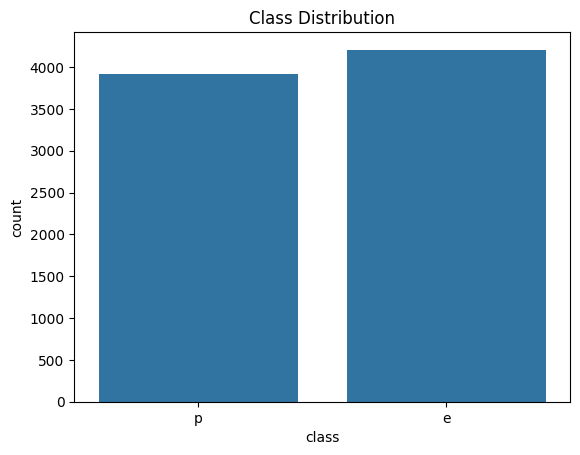

In [116]:
# Create a count plot for class balance
sns.countplot(x="class", data=mushrooms)
plt.title("Class Distribution")
plt.show()

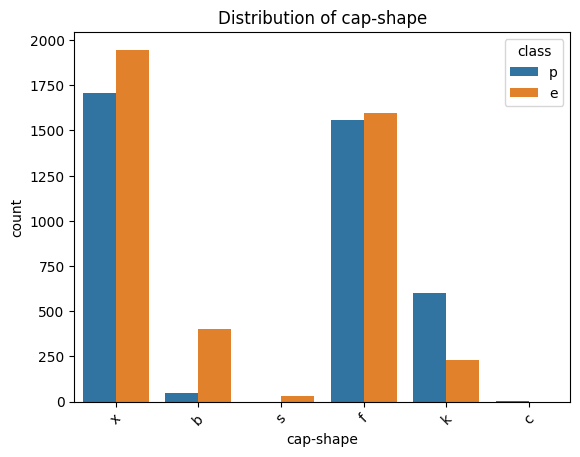

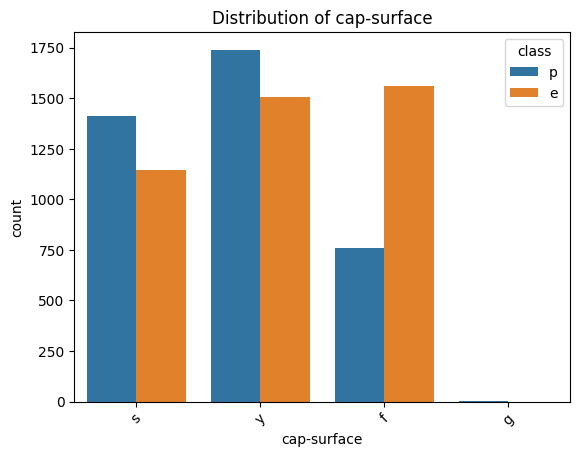

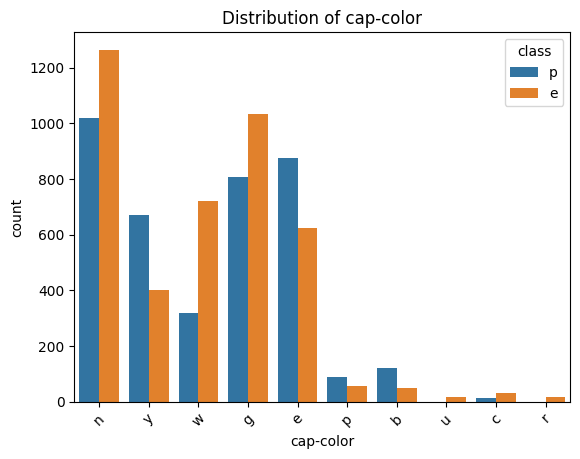

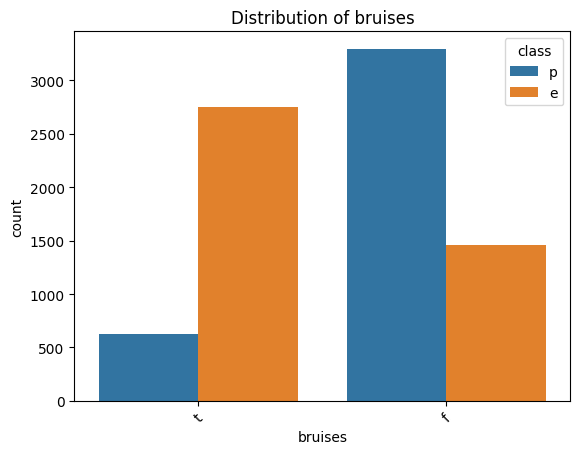

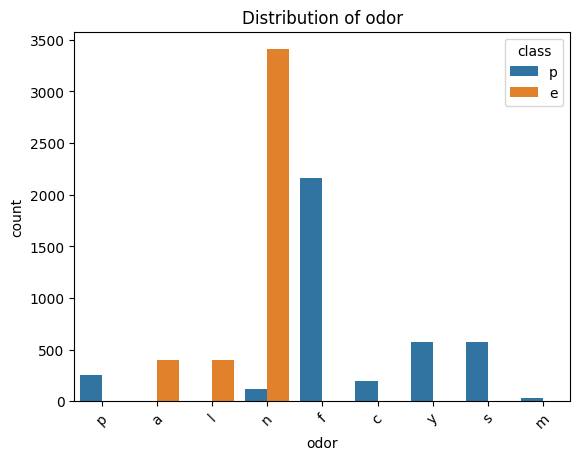

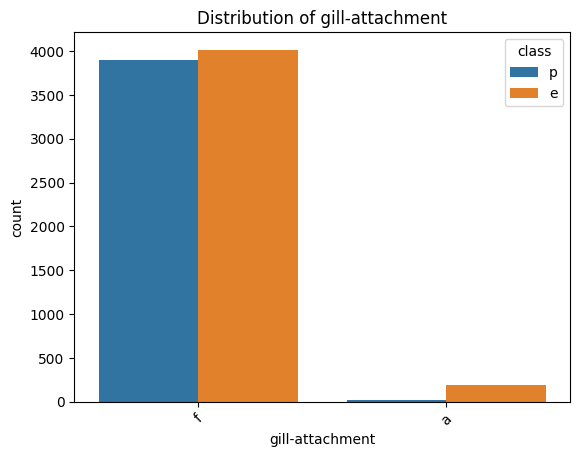

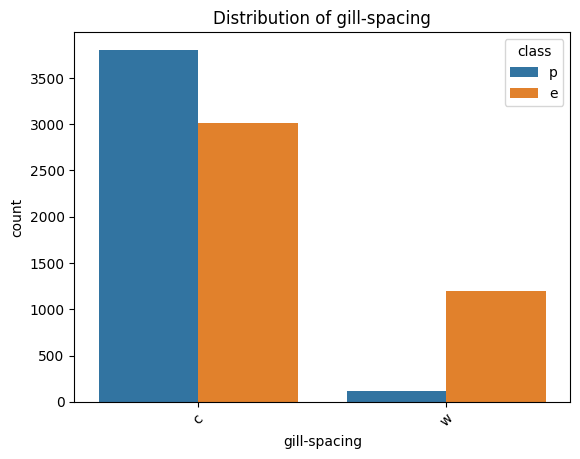

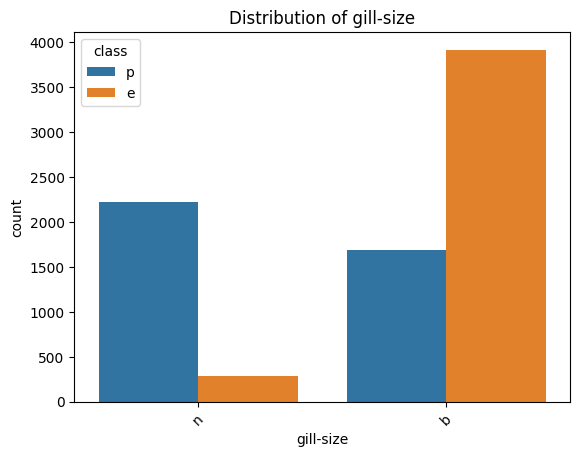

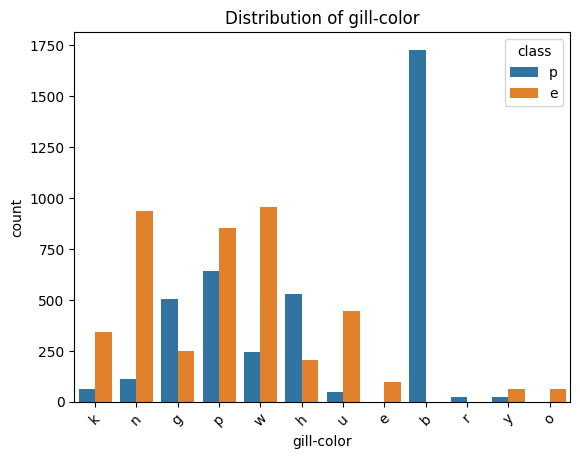

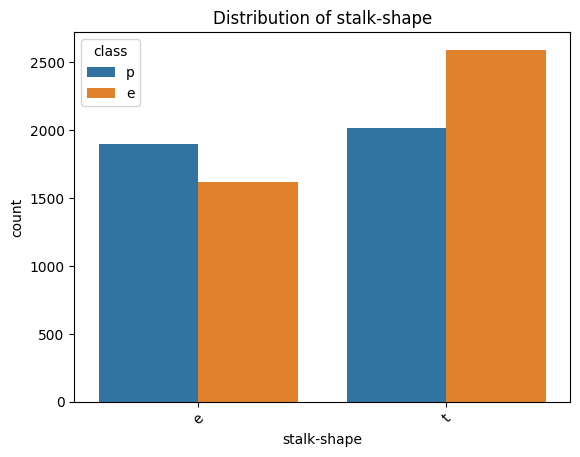

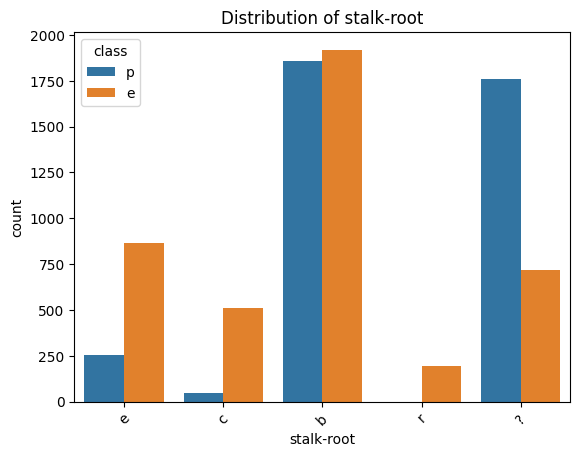

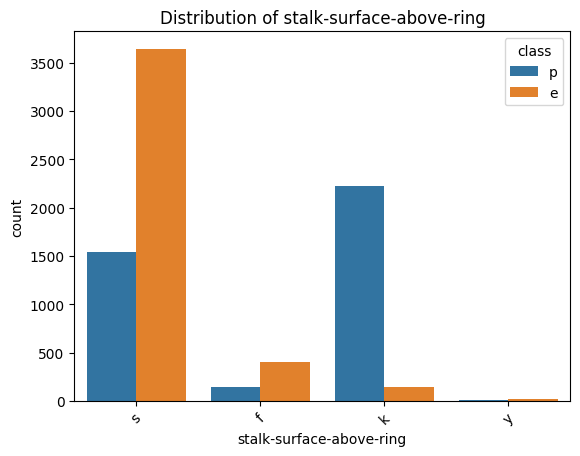

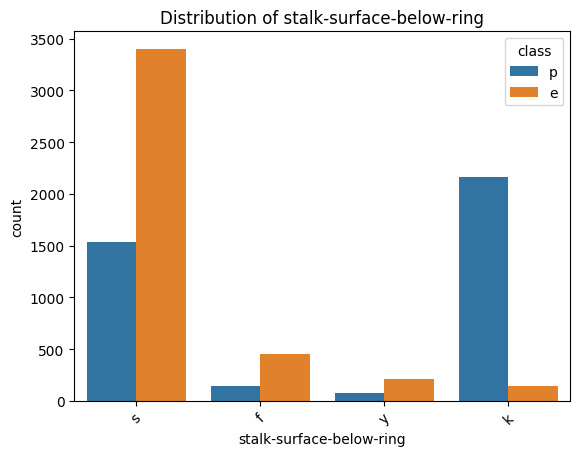

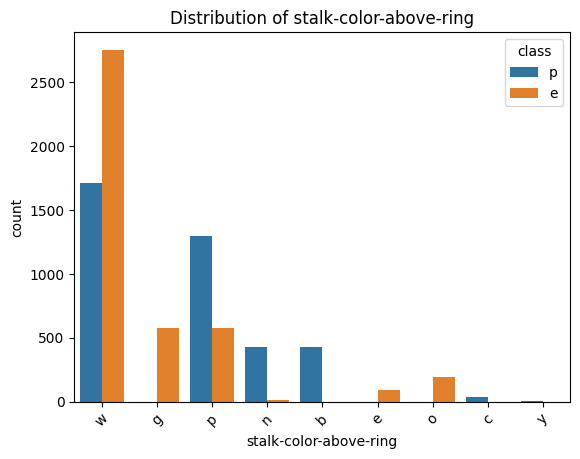

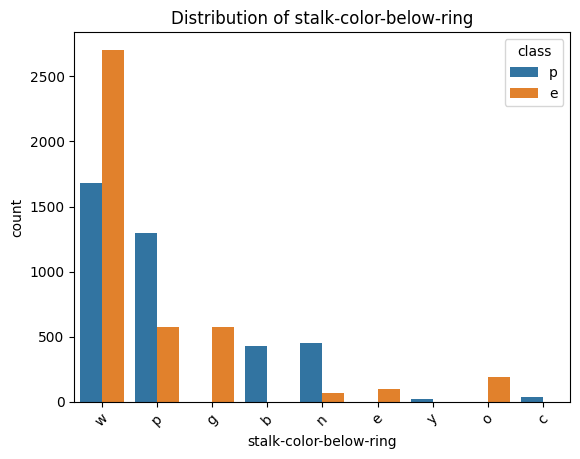

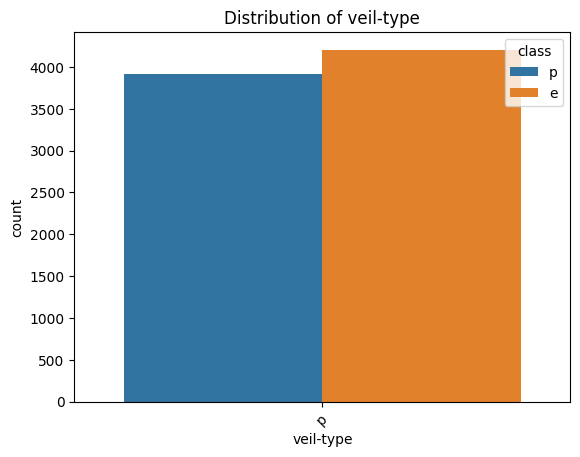

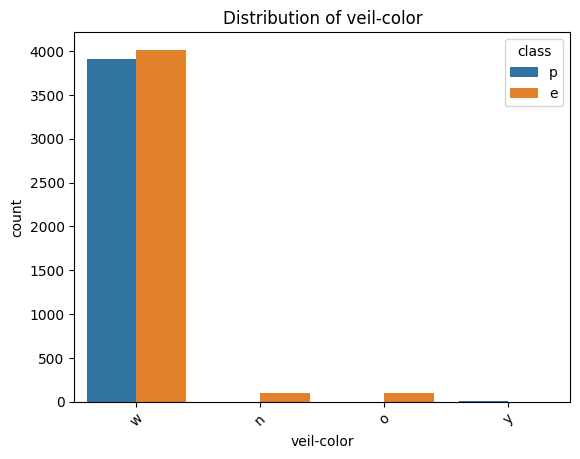

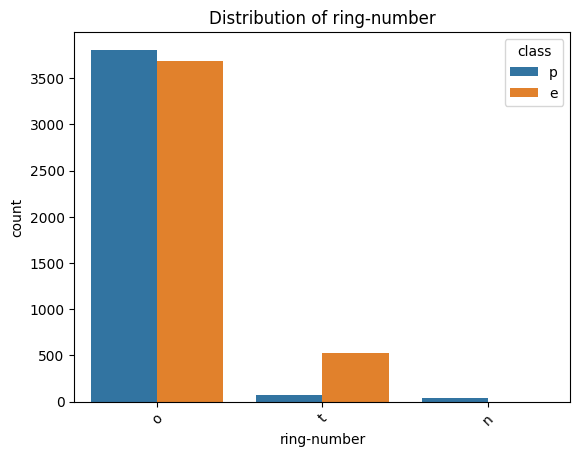

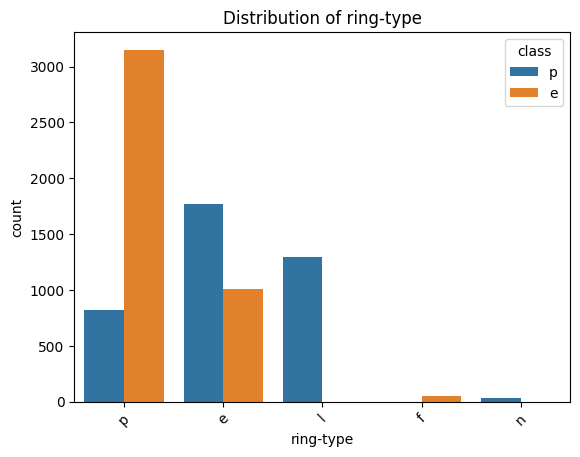

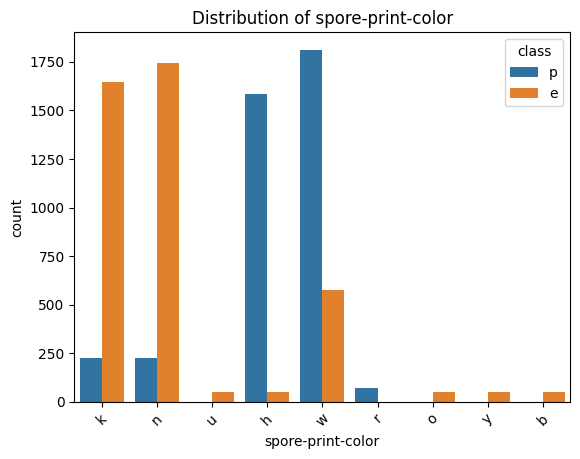

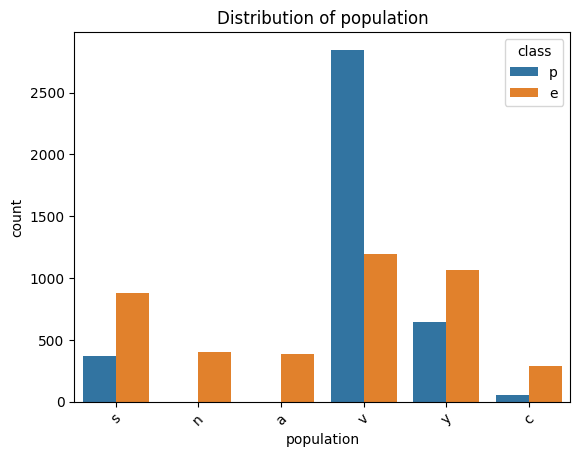

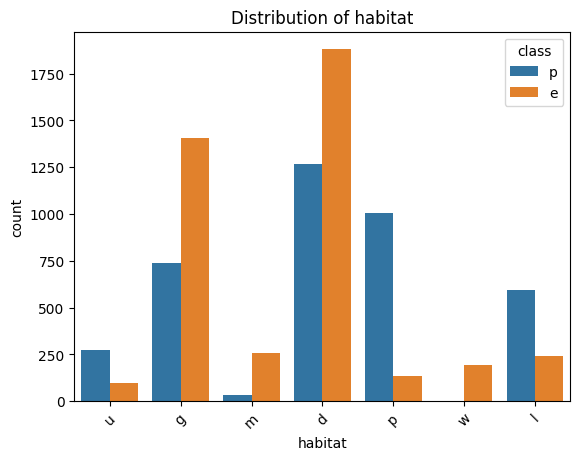

In [117]:
for col in mushrooms.columns:
    if col != "class":
        sns.countplot(x=col, hue="class", data=mushrooms)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()

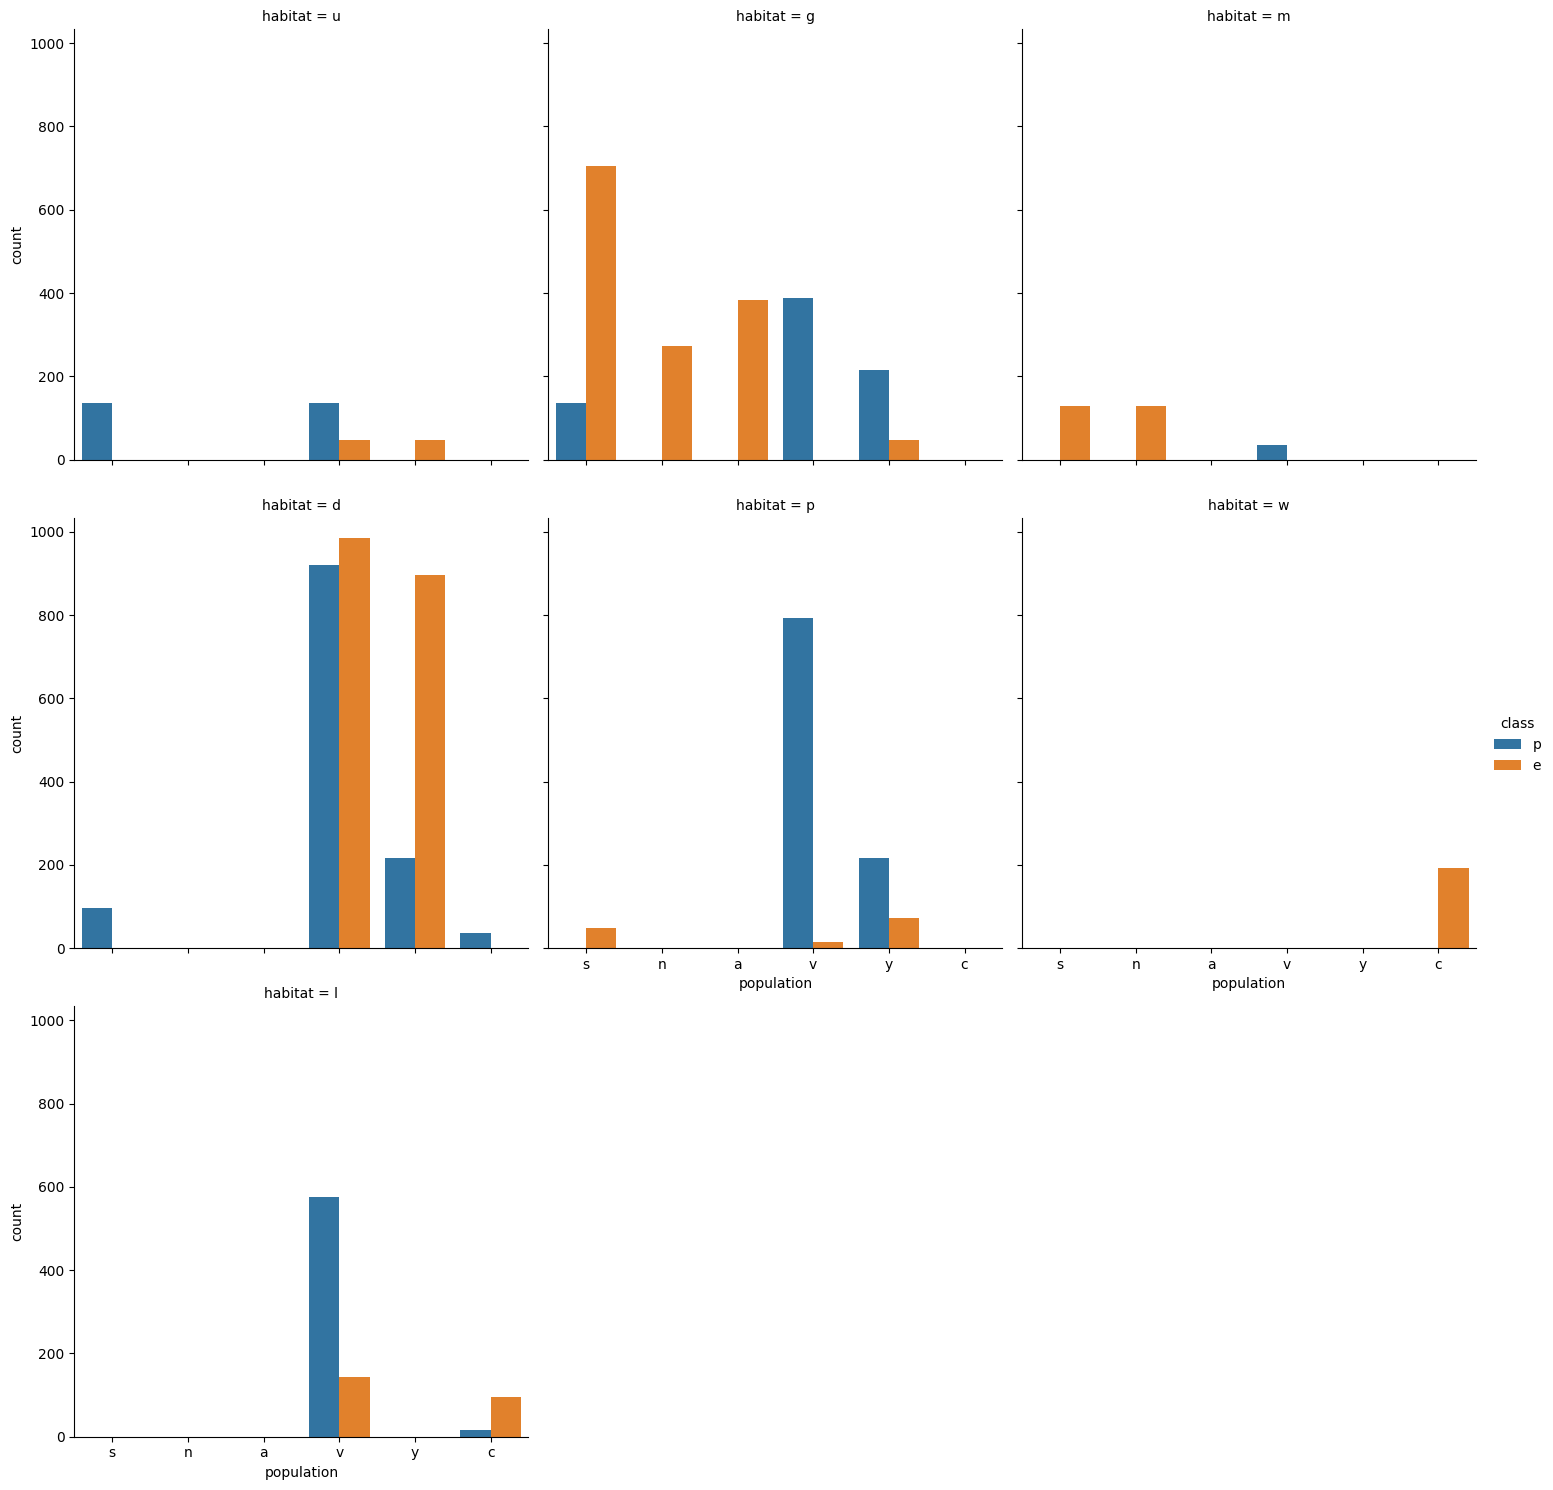

In [118]:
# Create catplot to see distribution of population across habitats
sns.catplot(x="population", hue="class", col="habitat", data=mushrooms, kind="count", col_wrap=3)


### 2.2 Handle Missing Values and Clean Data

In [119]:
# Drop stalk-root (column with missing values)
mushrooms = mushrooms.drop(columns=["stalk-root"])

# Drop veil-type (column that's almost constant)
mushrooms = mushrooms.drop(columns=["veil-type"])

# Rename class column to poisonous
mushrooms = mushrooms.rename(columns={"class": "poisonous"})

### 2.3 Feature Engineering

In [120]:
# Convert categorical data to numeric
mushrooms["poisonous"] = mushrooms["poisonous"].map({"p": 1, "e": 0})


# Merge rare categories of habitat into 'other'
mushrooms["habitat"] = mushrooms["habitat"].apply(lambda x: x if mushrooms["habitat"].value_counts()[x] > 50 else "other")

# Merge features with similar characteristics
mushrooms["ring_number_type"] = mushrooms["ring-number"] + "_" + mushrooms["ring-type"]
mushrooms["gill_size_color"] = mushrooms["gill-size"] + "_" + mushrooms["gill-color"]
mushrooms["stalk_surface"] = mushrooms["stalk-surface-above-ring"] + "_" + mushrooms["stalk-surface-below-ring"]

# Encode categorical features
mushrooms_encoded = mushrooms.apply(LabelEncoder().fit_transform)

### Reflection 2:

1) What patterns or anomalies do you see? **A handful of features show the distribution between poisonous/edible to be about 50/50.  Cap-surface, cap-shape, gill-attachment, and stalk-shape are good examples of this.**

2) Do any features stand out? **Odor and spore-print-color stand out the most as features that can predict poison.**

3) What preprocessing steps were necessary to clean and improve the data?  **I dropped a handful of columns, they were either missing a lot of values or constant between poisonous/edible.**

4) Did you create or modify any features to improve performance?  **I made the target a binary feature.  For 'habitat' I put the rare habitats in single other category, I merged categories that had similar properties so that there are less features to work with, and I created an encoded version of the dataset that is model-friendly.**

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target

The input features and target are as follows:
- input features: odor, spore-print-color
- target: poisonous

### 3.2 Define X and y

In [121]:
# Assign the input features and target variable

X = mushrooms_encoded[["odor", "spore-print-color"]]
y = mushrooms_encoded["poisonous"]

### Reflection 3:

1) Why did you choose these features?  **From the visuals created above, odor and spore-print-color seemed to show the highest odds of being highly predictive.**

2) How might they impact predictions or accuracy?  **In theory, they should make the model very accurate, as there are certain odors that only poisonous mushrooms have and other odors that only edible ones have.**

## Section 4. Train a Model (Decision Tree)

### 4.1 Split the Data

In [122]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 6499
Test size: 1625


### 4.2 Train the Model

In [123]:
# Create and train Decision Tree

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Evaluate Performance

In [124]:
# Make Predictions and show results
# Predict on the training set
y_train_pred = tree_model.predict(X_train)
print("Results for Decision Tree on training data:")
print(classification_report(y_train, y_train_pred))
print("---")
# Predict on the test set
y_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3345
           1       1.00      0.99      0.99      3154

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499

---
Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       863
           1       1.00      0.98      0.99       762

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



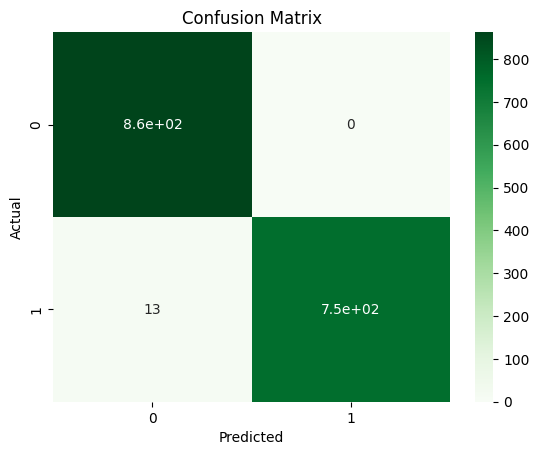

In [125]:
# Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

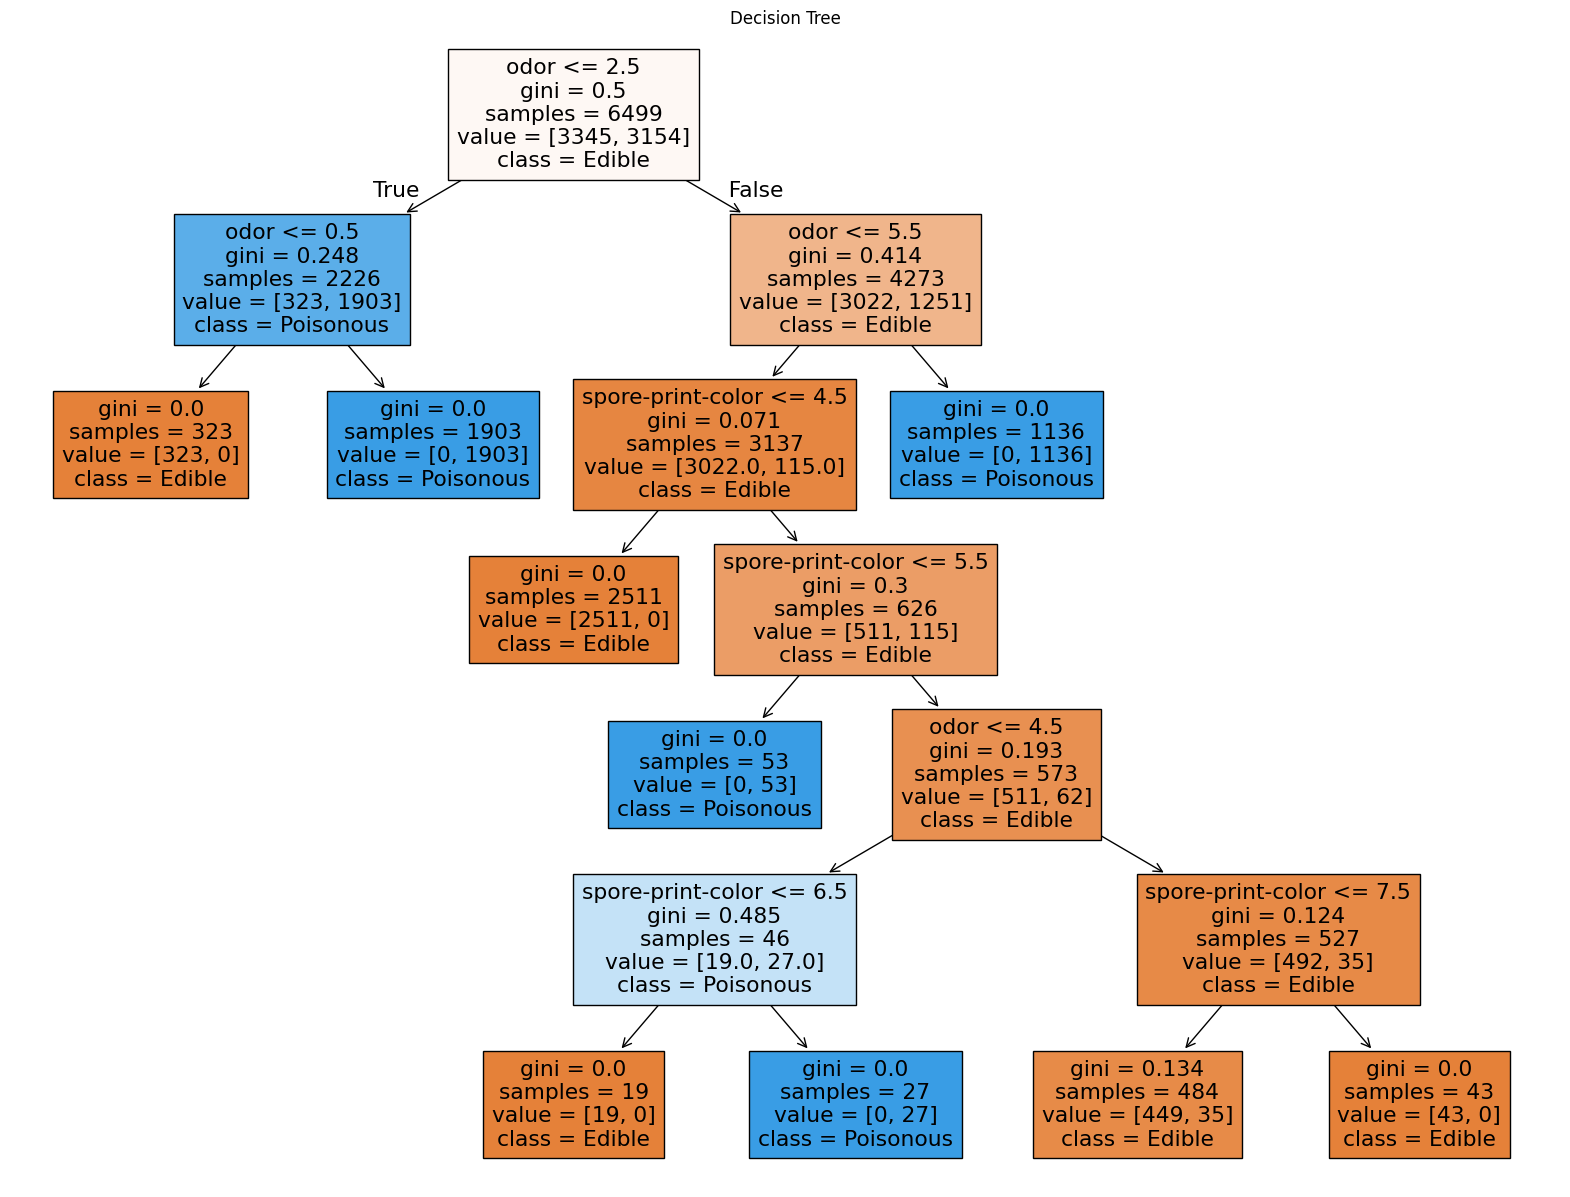

In [126]:
# Plot Decision Tree
fig = plt.figure(figsize=(20,15))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["Edible", "Poisonous"])
plt.title("Decision Tree")
plt.show()

### Reflection 4:

1) How well did the model perform?  **The model performed extremely well, with an accuracy of 99%.  I believe that this is due to the input features being very discriminatory.**

2) Any surprising results?  **I was surprised to see that the only errors in the model were 13 false negatives.  I was also surprised to see how small the tree is for how accurate it is.**